In [1]:
import pynucastro as pyna
from pynucastro.networks import AmrexAstroCxxNetwork
import subch_simple as ss

In [2]:
subch = ss.get_library()

removing:  p31(p,c12)ne20
removing:  si28(a,c12)ne20
removing:  ne20(c12,p)p31
removing:  ne20(c12,a)si28
removing:  na23(a,g)al27
removing:  al27(g,a)na23
removing:  al27(a,g)p31
removing:  p31(g,a)al27
modifying N13 ⟶ p + C12 from C12 + p ⟶ N13 + 𝛾
modifying O16 ⟶ He4 + C12 from C12 + He4 ⟶ O16 + 𝛾
modifying F18 ⟶ He4 + N14 from N14 + He4 ⟶ F18 + 𝛾
modifying Ne20 ⟶ He4 + O16 from O16 + He4 ⟶ Ne20 + 𝛾
modifying Na22 ⟶ p + Ne21 from Ne21 + p ⟶ Na22 + 𝛾
modifying Na22 ⟶ He4 + F18 from F18 + He4 ⟶ Na22 + 𝛾
modifying Mg24 ⟶ p + Na23 from Na23 + p ⟶ Mg24 + 𝛾
modifying Mg24 ⟶ He4 + Ne20 from Ne20 + He4 ⟶ Mg24 + 𝛾
modifying Si28 ⟶ p + Al27 from Al27 + p ⟶ Si28 + 𝛾
modifying Si28 ⟶ He4 + Mg24 from Mg24 + He4 ⟶ Si28 + 𝛾
modifying S32 ⟶ p + P31 from P31 + p ⟶ S32 + 𝛾
modifying S32 ⟶ He4 + Si28 from Si28 + He4 ⟶ S32 + 𝛾
modifying Cl35 ⟶ He4 + P31 from P31 + He4 ⟶ Cl35 + 𝛾
modifying Ar36 ⟶ p + Cl35 from Cl35 + p ⟶ Ar36 + 𝛾
modifying Ar36 ⟶ He4 + S32 from S32 + He4 ⟶ Ar36 + 𝛾
modifying K39 ⟶ He4 +

In [3]:
net = AmrexAstroCxxNetwork(libraries=[subch])
net.make_ap_pg_approx(intermediate_nuclei=["cl35", "k39", "sc43", "v47", "mn51", "co55"])
net.remove_nuclei(["cl35", "k39", "sc43", "v47", "mn51", "co55"])

using approximate rate S32 + He4 ⟶ Ar36 + 𝛾
using approximate rate Ar36 ⟶ S32 + He4
using approximate rate Ar36 + He4 ⟶ Ca40 + 𝛾
using approximate rate Ca40 ⟶ Ar36 + He4
using approximate rate Ca40 + He4 ⟶ Ti44 + 𝛾
using approximate rate Ti44 ⟶ Ca40 + He4
using approximate rate Ti44 + He4 ⟶ Cr48 + 𝛾
using approximate rate Cr48 ⟶ Ti44 + He4
using approximate rate Cr48 + He4 ⟶ Fe52 + 𝛾
using approximate rate Fe52 ⟶ Cr48 + He4
using approximate rate Fe52 + He4 ⟶ Ni56 + 𝛾
using approximate rate Ni56 ⟶ Fe52 + He4
removing rate S32 + He4 ⟶ Ar36 + 𝛾
removing rate S32 + He4 ⟶ p + Cl35
removing rate Cl35 + p ⟶ Ar36 + 𝛾
removing rate Ar36 ⟶ He4 + S32
removing rate Ar36 ⟶ p + Cl35
removing rate Cl35 + p ⟶ He4 + S32
removing rate Ar36 + He4 ⟶ Ca40 + 𝛾
removing rate Ar36 + He4 ⟶ p + K39
removing rate K39 + p ⟶ Ca40 + 𝛾
removing rate Ca40 ⟶ He4 + Ar36
removing rate Ca40 ⟶ p + K39
removing rate K39 + p ⟶ He4 + Ar36
removing rate Ca40 + He4 ⟶ Ti44 + 𝛾
removing rate Ca40 + He4 ⟶ p + Sc43
removing rate 

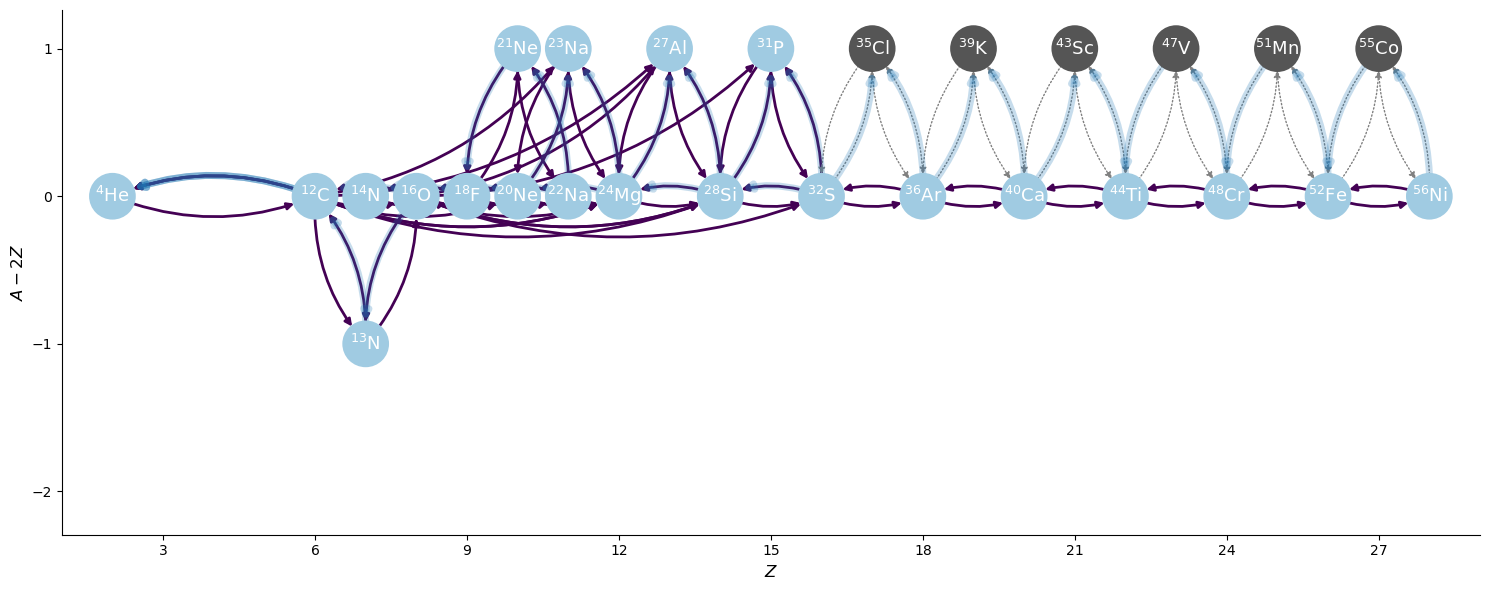

In [5]:
net.plot(outfile="highlight.png", rotated=True, curved_edges=True, hide_xalpha=True, size=(1500,600),
         highlight_filter_function=lambda r: isinstance(r, pyna.DerivedRate))

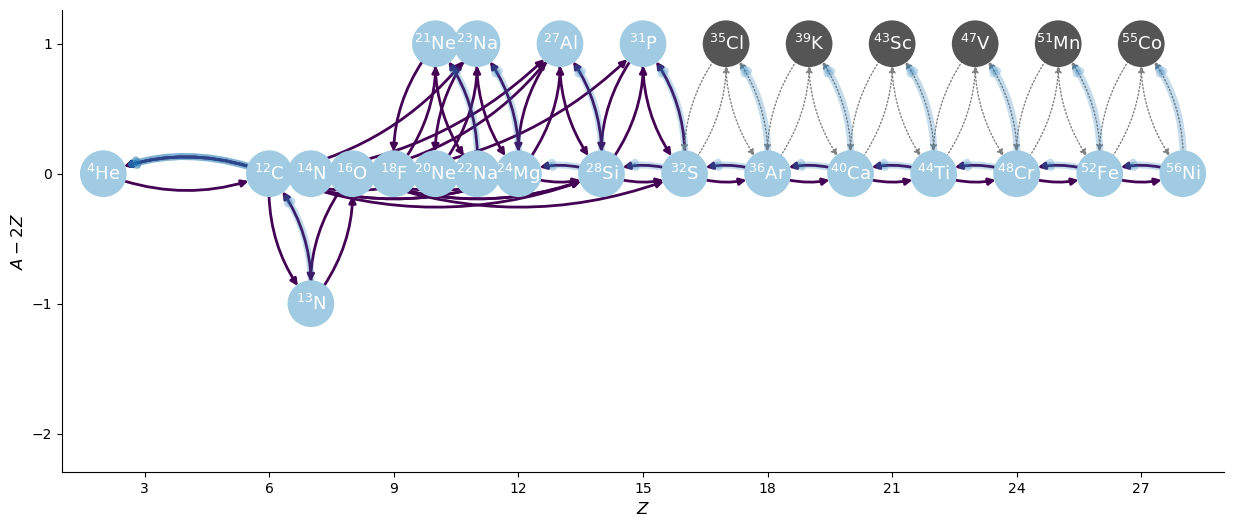

In [8]:
net.plot(rotated=True, curved_edges=True, hide_xalpha=True, size=(1500,600),
         highlight_filter_function=lambda r: len(r.reactants) == 1)